# Capstone Project - Big 10 Schools

## Introduction

Acording to the American Psychological Association, mental health within college students is a growing concern, since the number of students with significant psychological problems has increased during the last years. 

Anxiety is the top presenting concern among college students (41.6 percent), followed by depression (36.4 percent). On average, 24.5 percent of students take psychotropic medications. Additionally, 40 percent present mild mental health concerns.

Is necesary that students keep a healthy life where they can be involved in activities outside of campus according to their interests. Yet, in some cases, college towns don't have as much diversity on the activities available for students and therefore are not a good fit for some individuals. As a result, incoming undergraduates and graduates should be able to study their options weighting the kind of activities available. In the same manner, it would be possible to analize the different bussiness oportunities in each of these universities.

In this study, we will analize the venues in the Big 10 member colleges, and we will cluster them to analyze what are the most prominents venues and how would that affect life of students. 

## Data

Since the study will be applied to Big 10 Schools, they will be extracted from an online list. Then, the location of each will be looked for through geopy.

For this project Foursquare databases will be used as the main source to find the venues on each school. They will be accessed by explore requirements on the location of each university.From there, we will find the name, category and location of the venues. This data will be augmentated by adding the broad category of each venue with the use of the Foursquare Venue Category Hierarchy JSON file, that will be flattened to obtain all categories and the corresponding parent (broad) category. 

They venues will be analized in both specific and broad venue categories to profile each university. The percentage of each of the categories in the town will be used to cluster and analize the advantages and disadvantages of each location for different types of personalities, and explore possible bussiness oportunities in the area.

## Methodology

To start, we take the list of  Foursquare Venue Category Hierarchy JSON file. A visualization of this data can be found on https://developer.foursquare.com/docs/build-with-foursquare/categories/. In order to import it, we need to ddefine the client information for the developers account on foursquare.

In [1]:
import requests

CLIENT_ID = 'BZEGAEE1G0YMB0MQKCJ4VA4DBHZ4KCDAXSYZL5IPT1RVKFFB'
CLIENT_SECRET = 'RQSTQNRRCXQNLDN4UBKV213J3UO53Y4OZGSHQRBQEHZYZB5U'
VERSION = '20200417'

url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)

r = requests.get(url).json()

Then, we explored the file, finding that there are up to 5 nested categories, then, we extract the broad categories first: Arts & Entertainment, Food, Nightlife Spot, Outdoors & Recreation, Professional & Other Places, Shop & Service and Travel & Transport. Then all of the different nested categories are extracted by level and associated to the broad category.

In [2]:
import pandas as pd
from pandas import json_normalize
bigcategories=json_normalize(r['response']['categories'])
categories=[]
a=json_normalize(r['response']['categories'], record_path=['categories','categories','categories','categories'], meta=['id','name'], record_prefix='_')
categories=a[['_name','_id','id','name']]
a=json_normalize(r['response']['categories'], record_path=['categories','categories','categories'], meta=['id','name'], record_prefix='_')
categories=categories.append(a[['_name','_id','id','name']])
a=json_normalize(r['response']['categories'], record_path=['categories','categories'], meta=['id','name'], record_prefix='_')
categories=categories.append(a[['_name','_id','id','name']])
a=json_normalize(r['response']['categories'], record_path=['categories'], meta=['id','name'], record_prefix='_')
categories=categories.append(a[['_name','_id','id','name']])
categories

,_name,_id,id,name
0,Acai House,5294c7523cf9994f4e043a62,4d4b7105d754a06374d81259,Food
1,Baiano Restaurant,52939ae13cf9994f4e043a3b,4d4b7105d754a06374d81259,Food
2,Central Brazilian Restaurant,52939a9e3cf9994f4e043a36,4d4b7105d754a06374d81259,Food
3,Churrascaria,52939a643cf9994f4e043a33,4d4b7105d754a06374d81259,Food
4,Empada House,5294c55c3cf9994f4e043a61,4d4b7105d754a06374d81259,Food
...,...,...,...,...
454,Train Station,4bf58dd8d48988d129951735,4d4b7105d754a06379d81259,Travel & Transport
455,Tram Station,52f2ab2ebcbc57f1066b8b51,4d4b7105d754a06379d81259,Travel & Transport
456,Transportation Service,54541b70498ea6ccd0204bff,4d4b7105d754a06379d81259,Travel & Transport
457,Travel Lounge,4f04b25d2fb6e1c99f3db0c0,4d4b7105d754a06379d81259,Travel & Transport


Additionally, we import a list of the big 10 schools that includes information on performance and enrrollment. Yet, we will only use this table to extract the information about the universities and their location.

In [3]:
link="https://blog.prepscholar.com/big-10-schools"
tables=pd.read_html(link, header=0)
schools=tables[0]
schools=schools.drop(['Undergraduate Enrollment', 'Average SAT Score','Average ACT Score', 'Acceptance Rate'], axis=1)
schools

,School,Location
0,Northwestern University,"Evanston, IL"
1,University of Michigan,"Ann Arbor, MI"
2,University of Minnesota,"Minneapolis, MN"
3,University of Maryland,"College Park, MD"
4,University of Wisconsin,"Madison, WI"
5,The Ohio State University,"Columbus, OH"
6,Penn State University,"University Park, PA"
7,Rutgers University,"New Brunswick, NJ"
8,Purdue University,"West Lafayette, IN"
9,University of Illinois,"Champaign, IL"


Through Nominatim, we search for the latitude and logitude corresponding to each university. 

In [4]:
from  geopy.geocoders import Nominatim
geolocator = Nominatim()
latlog = pd.DataFrame(columns=['School','Latitude', 'Longitude'])
for i in schools['School']:
    loc = geolocator.geocode(i)
    lat=loc.latitude
    log=loc.longitude
    latlog=latlog.append({'School':i, 'Latitude':lat,'Longitude':log }, ignore_index=True)
latlog

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


,School,Latitude,Longitude
0,Northwestern University,42.055116,-87.675811
1,University of Michigan,42.294214,-83.710039
2,University of Minnesota,44.973086,-93.237088
3,University of Maryland,38.992030,-76.946103
4,University of Wisconsin,44.851978,-92.616756
5,The Ohio State University,40.005709,-83.028663
6,Penn State University,40.803448,-77.859119
7,Rutgers University,40.500076,-74.445792
8,Purdue University,40.431958,-86.923911
9,University of Illinois,40.141058,-88.255202


This information is then merged to the first table. To obtain all the information about the universities. 

In [5]:
sch = pd.merge(schools, latlog, on='School', how='left')
sch

,School,Location,Latitude,Longitude
0,Northwestern University,"Evanston, IL",42.055116,-87.675811
1,University of Michigan,"Ann Arbor, MI",42.294214,-83.710039
2,University of Minnesota,"Minneapolis, MN",44.973086,-93.237088
3,University of Maryland,"College Park, MD",38.992030,-76.946103
4,University of Wisconsin,"Madison, WI",44.851978,-92.616756
5,The Ohio State University,"Columbus, OH",40.005709,-83.028663
6,Penn State University,"University Park, PA",40.803448,-77.859119
7,Rutgers University,"New Brunswick, NJ",40.500076,-74.445792
8,Purdue University,"West Lafayette, IN",40.431958,-86.923911
9,University of Illinois,"Champaign, IL",40.141058,-88.255202


Then, we define the function that will search all the venues of the different universities on a radius of 10km from the university. 

In [6]:
import requests
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
             name, 
             lat, 
             lng, 
             v['venue']['name'], 
             v['venue']['location']['lat'], 
             v['venue']['location']['lng'],  
             v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['School', 
        'School Latitude', 
        'School Longitude', 
        'Venue', 
        'Venue Latitude', 
        'Venue Longitude', 
        'Venue Category']
    
    return(nearby_venues)

Then, we use the function we created to search for the venues in all the schools

In [7]:
LIMIT=100
venuesbyschool =[]
venuesbyschool = getNearbyVenues(names=sch['School'],
                                   latitudes=sch['Latitude'],
                                   longitudes=sch['Longitude']
                                  )
venuesbyschool

Northwestern University
University of Michigan
University of Minnesota
University of Maryland
University of Wisconsin
The Ohio State University
Penn State University
Rutgers University
Purdue University
University of Illinois
Michigan State University
University of Nebraska-Lincoln
Indiana University
University of Iowa


,School,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Northwestern University,42.055116,-87.675811,Centennial Park,42.047476,-87.674032,Park
1,Northwestern University,42.055116,-87.675811,Bennison's Bakery,42.046891,-87.685028,Bakery
2,Northwestern University,42.055116,-87.675811,Segal Visitors Center,42.050249,-87.673408,College Administrative Building
3,Northwestern University,42.055116,-87.675811,Lighthouse Beach,42.064547,-87.676488,Beach
4,Northwestern University,42.055116,-87.675811,Century Theatre,42.048936,-87.684647,Movie Theater
...,...,...,...,...,...,...,...
1342,University of Iowa,41.665901,-91.573188,Pizza Hut,41.651483,-91.502485,Pizza Place
1343,University of Iowa,41.665901,-91.573188,U.S. Bank ATM,41.647993,-91.499054,ATM
1344,University of Iowa,41.665901,-91.573188,Dairy Queen,41.642575,-91.510397,Ice Cream Shop
1345,University of Iowa,41.665901,-91.573188,Panchero's Mexican Grill,41.751246,-91.608293,Burrito Place


We were able to find 1345 venues in all the universities, a good number to sample all the cities. We then associate the venue categories of all the entries (specific) with the broad categories. 

In [8]:
venuesbyschool = pd.merge(venuesbyschool, categories[['_name','name']].rename(columns={'_name':'Venue Category'}), on='Venue Category', how='left')
venuesbyschool

,School,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,name
0,Northwestern University,42.055116,-87.675811,Centennial Park,42.047476,-87.674032,Park,Outdoors & Recreation
1,Northwestern University,42.055116,-87.675811,Bennison's Bakery,42.046891,-87.685028,Bakery,Food
2,Northwestern University,42.055116,-87.675811,Segal Visitors Center,42.050249,-87.673408,College Administrative Building,College & University
3,Northwestern University,42.055116,-87.675811,Lighthouse Beach,42.064547,-87.676488,Beach,Outdoors & Recreation
4,Northwestern University,42.055116,-87.675811,Century Theatre,42.048936,-87.684647,Movie Theater,Arts & Entertainment
...,...,...,...,...,...,...,...,...
1342,University of Iowa,41.665901,-91.573188,Pizza Hut,41.651483,-91.502485,Pizza Place,Food
1343,University of Iowa,41.665901,-91.573188,U.S. Bank ATM,41.647993,-91.499054,ATM,Shop & Service
1344,University of Iowa,41.665901,-91.573188,Dairy Queen,41.642575,-91.510397,Ice Cream Shop,Food
1345,University of Iowa,41.665901,-91.573188,Panchero's Mexican Grill,41.751246,-91.608293,Burrito Place,Food


We then evaluate how many venues did we find on each school. And find that only the university of Wisconsin found 45 venues, but all other universities obtained the limit that is 100 venues

In [9]:
number=pd.DataFrame(venuesbyschool.groupby('School').count()['Venue'])
venues = pd.merge(sch, number, on='School', how='left')
venues=venues.fillna(0)
venues=venues.sort_values(by=['Venue']).reset_index(drop=True)
venues

,School,Location,Latitude,Longitude,Venue
0,University of Wisconsin,"Madison, WI",44.851978,-92.616756,47
1,Northwestern University,"Evanston, IL",42.055116,-87.675811,100
2,University of Michigan,"Ann Arbor, MI",42.294214,-83.710039,100
3,University of Minnesota,"Minneapolis, MN",44.973086,-93.237088,100
4,University of Maryland,"College Park, MD",38.992030,-76.946103,100
5,The Ohio State University,"Columbus, OH",40.005709,-83.028663,100
6,Penn State University,"University Park, PA",40.803448,-77.859119,100
7,Rutgers University,"New Brunswick, NJ",40.500076,-74.445792,100
8,Purdue University,"West Lafayette, IN",40.431958,-86.923911,100
9,University of Illinois,"Champaign, IL",40.141058,-88.255202,100


### Specific Categories

Then, we convert the specific venues categories (230) into dummy variables and group them by university to find the percentage of venues corresponding to each category on each university.

In [10]:
ven_dum = pd.get_dummies(venuesbyschool[['Venue Category']], prefix="", prefix_sep="")
#ven_dum=ven_dum.insert(0,'School',sch['School'])
ven_dum['School']=venuesbyschool['School']
ven_dum

cols = list(ven_dum.columns)
cols = [cols[-1]] + cols[:-1]
ven_dum = ven_dum[cols]
ven_dum

dum_grouped = ven_dum.groupby('School').mean().reset_index()
dum_grouped

,School,ATM,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Indiana University,0.00,0.00,0.030000,0.00,0.00,0.00,0.01,0.00,0.00,...,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00
1,Michigan State University,0.00,0.00,0.030000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.01
2,Northwestern University,0.00,0.00,0.010000,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00
3,Penn State University,0.00,0.00,0.040000,0.00,0.00,0.00,0.00,0.02,0.00,...,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00
4,Purdue University,0.00,0.00,0.020000,0.00,0.01,0.00,0.01,0.00,0.00,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Rutgers University,0.00,0.00,0.020000,0.00,0.00,0.00,0.01,0.01,0.00,...,0.00,0.02,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00
6,The Ohio State University,0.00,0.00,0.040000,0.00,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,University of Illinois,0.00,0.00,0.030000,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,University of Iowa,0.01,0.00,0.050000,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,University of Maryland,0.00,0.02,0.030000,0.00,0.00,0.00,0.00,0.01,0.01,...,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00


We then explore the most common venues in each university

In [11]:
import numpy as np
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['School']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['School'] = dum_grouped['School']

for ind in np.arange(dum_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(dum_grouped.iloc[ind, :], num_top_venues)

venues_sorted

,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Indiana University,Pizza Place,Grocery Store,Fast Food Restaurant,Gym,Brewery,Mexican Restaurant,American Restaurant,Park,Ice Cream Shop,Gym / Fitness Center
1,Michigan State University,Coffee Shop,Bar,Sushi Restaurant,Grocery Store,American Restaurant,Salon / Barbershop,Ice Cream Shop,Seafood Restaurant,Garden,Gym / Fitness Center
2,Northwestern University,Park,Coffee Shop,Pizza Place,Grocery Store,Bakery,Beach,Café,Hot Dog Joint,Playground,Burger Joint
3,Penn State University,Café,American Restaurant,Hotel,Salon / Barbershop,Park,Coffee Shop,Ice Cream Shop,Pool,Thai Restaurant,Gas Station
4,Purdue University,Coffee Shop,Mexican Restaurant,Sandwich Place,Bakery,Burger Joint,Park,Grocery Store,Pizza Place,Bar,Diner
5,Rutgers University,Pizza Place,Bakery,Coffee Shop,Italian Restaurant,Chinese Restaurant,Mediterranean Restaurant,Supermarket,Burger Joint,Bubble Tea Shop,Pet Store
6,The Ohio State University,Park,Pizza Place,Grocery Store,Coffee Shop,Ice Cream Shop,American Restaurant,Café,Bar,Bookstore,Restaurant
7,University of Illinois,Mexican Restaurant,Cosmetics Shop,BBQ Joint,Pizza Place,Chinese Restaurant,Steakhouse,Clothing Store,Bar,Bakery,Coffee Shop
8,University of Iowa,Grocery Store,Coffee Shop,American Restaurant,Pizza Place,Italian Restaurant,Diner,Bakery,Park,Ice Cream Shop,Burrito Place
9,University of Maryland,Grocery Store,Brewery,Pizza Place,American Restaurant,Coffee Shop,Convenience Store,Gym,Italian Restaurant,Café,Salad Place


Then we use the elbow method to evaluate which number of clusters is better. 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[2 2 1 2 2 2 1 2 1 1 1 2 2 0]
[1 1 3 1 1 1 3 1 3 3 3 0 1 2]
[4 3 1 3 3 3 1 3 4 4 1 0 3 2]
[4 1 0 1 1 1 5 1 4 4 0 2 1 3]
[4 1 0 3 3 3 5 3 4 4 0 6 3 2]
[0 6 4 2 5 2 7 2 0 0 4 3 5 1]
[1 7 2 6 5 0 8 0 1 1 2 3 5 4]
[4 7 2 8 6 1 0 1 4 9 2 5 6 3]
[ 1  7 10  6  4  9  0  9  1  8  5  2  4  3]
[ 2  9  5  0 11  7  3  7  2  8 10  4  6  1]
[ 1  8  3  5  7  0  9 12  1  6 11  4 10  2]


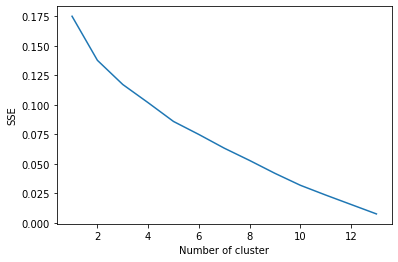

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

grouped_clustering = dum_grouped.drop('School', 1)
sse = {}
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(grouped_clustering)
    print(kmeans.labels_)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

The result is hard to observe, but the elbow is located on 5 clusters. Therefore, we then cluster the university into 5 groups. 

In [13]:
kclusters = 5

grouped_clustering = dum_grouped.drop('School', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 1, 3, 1, 1, 2, 3, 2, 1, 2, 3, 0, 2, 4])

We add this information to the previous dataframe.

In [14]:
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

klusterdf = sch
klusterdf= klusterdf.join(venues_sorted.set_index('School'), on='School')
klusterdf

,School,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Northwestern University,"Evanston, IL",42.055116,-87.675811,3,Park,Coffee Shop,Pizza Place,Grocery Store,Bakery,Beach,Café,Hot Dog Joint,Playground,Burger Joint
1,University of Michigan,"Ann Arbor, MI",42.294214,-83.710039,3,Grocery Store,Park,Coffee Shop,Gym,Music Venue,Bookstore,Vegetarian / Vegan Restaurant,Bakery,Breakfast Spot,Mexican Restaurant
2,University of Minnesota,"Minneapolis, MN",44.973086,-93.237088,0,Brewery,Park,Pizza Place,Theater,Liquor Store,Mexican Restaurant,New American Restaurant,Coffee Shop,Vietnamese Restaurant,Farmers Market
3,University of Maryland,"College Park, MD",38.992030,-76.946103,2,Grocery Store,Brewery,Pizza Place,American Restaurant,Coffee Shop,Convenience Store,Gym,Italian Restaurant,Café,Salad Place
4,University of Wisconsin,"Madison, WI",44.851978,-92.616756,4,Bar,Pizza Place,Sandwich Place,Convenience Store,Liquor Store,Brewery,Park,Golf Course,Business Service,Grocery Store
5,The Ohio State University,"Columbus, OH",40.005709,-83.028663,3,Park,Pizza Place,Grocery Store,Coffee Shop,Ice Cream Shop,American Restaurant,Café,Bar,Bookstore,Restaurant
6,Penn State University,"University Park, PA",40.803448,-77.859119,1,Café,American Restaurant,Hotel,Salon / Barbershop,Park,Coffee Shop,Ice Cream Shop,Pool,Thai Restaurant,Gas Station
7,Rutgers University,"New Brunswick, NJ",40.500076,-74.445792,2,Pizza Place,Bakery,Coffee Shop,Italian Restaurant,Chinese Restaurant,Mediterranean Restaurant,Supermarket,Burger Joint,Bubble Tea Shop,Pet Store
8,Purdue University,"West Lafayette, IN",40.431958,-86.923911,1,Coffee Shop,Mexican Restaurant,Sandwich Place,Bakery,Burger Joint,Park,Grocery Store,Pizza Place,Bar,Diner
9,University of Illinois,"Champaign, IL",40.141058,-88.255202,2,Mexican Restaurant,Cosmetics Shop,BBQ Joint,Pizza Place,Chinese Restaurant,Steakhouse,Clothing Store,Bar,Bakery,Coffee Shop


### Broad Categories

We continue to repeat the process with the broad categories. We define dummy variables for all the categories and find the percentage of each in every school.

In [15]:
ven_dum_b = pd.get_dummies(venuesbyschool[['name']], prefix="", prefix_sep="")
ven_dum_b['School']=venuesbyschool['School']
ven_dum_b=ven_dum_b.drop(['College & University'], axis=1)

dum_grouped_b = ven_dum_b.groupby('School').mean().reset_index()
dum_grouped_b

,School,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
0,Indiana University,0.07000,0.440000,0.050000,0.120000,0.00,0.300000,0.00
1,Michigan State University,0.06000,0.520000,0.070000,0.110000,0.00,0.200000,0.00
2,Northwestern University,0.04000,0.510000,0.030000,0.200000,0.00,0.200000,0.00
3,Penn State University,0.04000,0.450000,0.090000,0.110000,0.03,0.200000,0.04
4,Purdue University,0.05000,0.590000,0.070000,0.080000,0.00,0.180000,0.01
5,Rutgers University,0.04000,0.620000,0.040000,0.070000,0.02,0.180000,0.00
6,The Ohio State University,0.06000,0.500000,0.060000,0.150000,0.02,0.200000,0.01
7,University of Illinois,0.04000,0.530000,0.060000,0.040000,0.00,0.320000,0.01
8,University of Iowa,0.03000,0.510000,0.060000,0.070000,0.00,0.260000,0.01
9,University of Maryland,0.05000,0.480000,0.090000,0.120000,0.01,0.250000,0.00


Similarly, we visualize the importance of each category by university

In [16]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['School']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
bvenues_sorted = pd.DataFrame(columns=columns)
bvenues_sorted['School'] = dum_grouped_b['School']

for ind in np.arange(dum_grouped.shape[0]):
    bvenues_sorted.iloc[ind, 1:] = return_most_common_venues(dum_grouped_b.iloc[ind, :], num_top_venues)

bvenues_sorted

,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Indiana University,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Nightlife Spot,Travel & Transport,Professional & Other Places
1,Michigan State University,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Travel & Transport,Professional & Other Places
2,Northwestern University,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Nightlife Spot,Travel & Transport,Professional & Other Places
3,Penn State University,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Travel & Transport,Arts & Entertainment,Professional & Other Places
4,Purdue University,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Travel & Transport,Professional & Other Places
5,Rutgers University,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Professional & Other Places,Travel & Transport
6,The Ohio State University,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Professional & Other Places,Travel & Transport
7,University of Illinois,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment,Travel & Transport,Professional & Other Places
8,University of Iowa,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Travel & Transport,Professional & Other Places
9,University of Maryland,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Professional & Other Places,Travel & Transport


We then repeat the elbow method, to find the number of clusters that better fit the system.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[0 0 0 0 1 1 0 0 0 0 0 0 1 2]
[2 0 0 0 1 1 0 2 2 2 0 0 1 3]
[1 1 1 1 2 2 1 0 0 1 1 3 2 4]
[3 1 1 1 0 0 1 3 3 1 1 2 5 4]
[0 1 1 1 5 5 1 2 2 1 0 4 6 3]
[3 1 7 1 6 6 1 5 5 1 7 0 4 2]
[2 0 8 7 5 5 0 4 4 0 2 3 6 1]
[5 1 7 9 4 4 1 3 3 8 8 0 6 2]
[ 0  1  9  8  3  3  1  5  5 10  6  4  7  2]
[ 6  0 11 10  3  3  0  8  2  7  9  5  4  1]
[ 2  1 12  7  6  6  4  9  5 10 11  0  8  3]


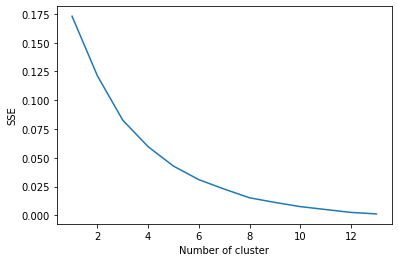

In [17]:
sse = {}
bgrouped_clustering = dum_grouped_b.drop('School', 1)
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(bgrouped_clustering)
    print(kmeans.labels_)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

We find again an inflection at 8 and 5 clusters. Yet, 8 clusters would single too many universities and therefore, 5 clusters still describes the relationship between the samples. and is chosen to work with. 

In [18]:
kclusters = 5

bgrouped_clustering = dum_grouped_b.drop('School', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bgrouped_clustering)

kmeans.labels_

bvenues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
bvenues_sorted

dum_grouped_b.insert(1, 'Cluster Labels', kmeans.labels_)

bkluster = sch
bkluster= bkluster.join(bvenues_sorted.set_index('School'), on='School')
bkluster

,School,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Northwestern University,"Evanston, IL",42.055116,-87.675811,1,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Nightlife Spot,Travel & Transport,Professional & Other Places
1,University of Michigan,"Ann Arbor, MI",42.294214,-83.710039,1,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Professional & Other Places,Travel & Transport
2,University of Minnesota,"Minneapolis, MN",44.973086,-93.237088,4,Food,Shop & Service,Arts & Entertainment,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Travel & Transport
3,University of Maryland,"College Park, MD",38.992030,-76.946103,1,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Professional & Other Places,Travel & Transport
4,University of Wisconsin,"Madison, WI",44.851978,-92.616756,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment,Travel & Transport,Professional & Other Places
5,The Ohio State University,"Columbus, OH",40.005709,-83.028663,1,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Professional & Other Places,Travel & Transport
6,Penn State University,"University Park, PA",40.803448,-77.859119,1,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Travel & Transport,Arts & Entertainment,Professional & Other Places
7,Rutgers University,"New Brunswick, NJ",40.500076,-74.445792,2,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Professional & Other Places,Travel & Transport
8,Purdue University,"West Lafayette, IN",40.431958,-86.923911,2,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment,Travel & Transport,Professional & Other Places
9,University of Illinois,"Champaign, IL",40.141058,-88.255202,3,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment,Travel & Transport,Professional & Other Places


## Results

### Specific Categories

We then, visualize the different clusters in a map

In [19]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import numpy as np

latitude=41.6026364
longitude=-86.1535308

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(klusterdf['Latitude'], klusterdf['Longitude'], klusterdf['School'], klusterdf['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

And we show the main characteristics of each cluster

In [20]:
klusterdf.loc[klusterdf['Cluster Labels'] == 0,klusterdf.columns[[0]+list(range(5, klusterdf.shape[1]))]]

,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,University of Minnesota,Brewery,Park,Pizza Place,Theater,Liquor Store,Mexican Restaurant,New American Restaurant,Coffee Shop,Vietnamese Restaurant,Farmers Market


In [21]:
klusterdf.loc[klusterdf['Cluster Labels'] == 1,klusterdf.columns[[0]+list(range(5, klusterdf.shape[1]))]]

,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Penn State University,Café,American Restaurant,Hotel,Salon / Barbershop,Park,Coffee Shop,Ice Cream Shop,Pool,Thai Restaurant,Gas Station
8,Purdue University,Coffee Shop,Mexican Restaurant,Sandwich Place,Bakery,Burger Joint,Park,Grocery Store,Pizza Place,Bar,Diner
10,Michigan State University,Coffee Shop,Bar,Sushi Restaurant,Grocery Store,American Restaurant,Salon / Barbershop,Ice Cream Shop,Seafood Restaurant,Garden,Gym / Fitness Center
13,University of Iowa,Grocery Store,Coffee Shop,American Restaurant,Pizza Place,Italian Restaurant,Diner,Bakery,Park,Ice Cream Shop,Burrito Place


In [22]:
klusterdf.loc[klusterdf['Cluster Labels'] == 2,klusterdf.columns[[0]+list(range(5, klusterdf.shape[1]))]]

,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,University of Maryland,Grocery Store,Brewery,Pizza Place,American Restaurant,Coffee Shop,Convenience Store,Gym,Italian Restaurant,Café,Salad Place
7,Rutgers University,Pizza Place,Bakery,Coffee Shop,Italian Restaurant,Chinese Restaurant,Mediterranean Restaurant,Supermarket,Burger Joint,Bubble Tea Shop,Pet Store
9,University of Illinois,Mexican Restaurant,Cosmetics Shop,BBQ Joint,Pizza Place,Chinese Restaurant,Steakhouse,Clothing Store,Bar,Bakery,Coffee Shop
11,University of Nebraska-Lincoln,Mexican Restaurant,Brewery,Coffee Shop,Chinese Restaurant,Pizza Place,Grocery Store,Burger Joint,Bakery,Fried Chicken Joint,Park
12,Indiana University,Pizza Place,Grocery Store,Fast Food Restaurant,Gym,Brewery,Mexican Restaurant,American Restaurant,Park,Ice Cream Shop,Gym / Fitness Center


In [23]:
klusterdf.loc[klusterdf['Cluster Labels'] == 3,klusterdf.columns[[0]+list(range(5, klusterdf.shape[1]))]]

,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Northwestern University,Park,Coffee Shop,Pizza Place,Grocery Store,Bakery,Beach,Café,Hot Dog Joint,Playground,Burger Joint
1,University of Michigan,Grocery Store,Park,Coffee Shop,Gym,Music Venue,Bookstore,Vegetarian / Vegan Restaurant,Bakery,Breakfast Spot,Mexican Restaurant
5,The Ohio State University,Park,Pizza Place,Grocery Store,Coffee Shop,Ice Cream Shop,American Restaurant,Café,Bar,Bookstore,Restaurant


In [24]:
klusterdf.loc[klusterdf['Cluster Labels'] == 4,klusterdf.columns[[0]+list(range(5, klusterdf.shape[1]))]]

,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,University of Wisconsin,Bar,Pizza Place,Sandwich Place,Convenience Store,Liquor Store,Brewery,Park,Golf Course,Business Service,Grocery Store


### Broad Categories

We continue with the same analysis as done in the broad categories. And each cluster is Analized.

In [25]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import numpy as np

latitude=41.6026364
longitude=-86.1535308

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(bkluster['Latitude'], bkluster['Longitude'], bkluster['School'], bkluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [26]:
dum_grouped_b.loc[dum_grouped_b['Cluster Labels'] == 0,dum_grouped_b.columns[list(range(0, dum_grouped_b.shape[1]))]]

,School,Cluster Labels,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
13,University of Wisconsin,0,0.06383,0.340426,0.234043,0.106383,0.0,0.255319,0.0


In [27]:
dum_grouped_b.loc[dum_grouped_b['Cluster Labels'] == 1,dum_grouped_b.columns[list(range(0, dum_grouped_b.shape[1]))]]

,School,Cluster Labels,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
0,Indiana University,1,0.07,0.44,0.05,0.12,0.00,0.30,0.00
1,Michigan State University,1,0.06,0.52,0.07,0.11,0.00,0.20,0.00
2,Northwestern University,1,0.04,0.51,0.03,0.20,0.00,0.20,0.00
3,Penn State University,1,0.04,0.45,0.09,0.11,0.03,0.20,0.04
6,The Ohio State University,1,0.06,0.50,0.06,0.15,0.02,0.20,0.01
9,University of Maryland,1,0.05,0.48,0.09,0.12,0.01,0.25,0.00
10,University of Michigan,1,0.05,0.45,0.05,0.17,0.01,0.24,0.00


In [28]:
dum_grouped_b.loc[dum_grouped_b['Cluster Labels'] == 2,dum_grouped_b.columns[list(range(0, dum_grouped_b.shape[1]))]]

,School,Cluster Labels,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
4,Purdue University,2,0.05,0.59,0.07,0.08,0.00,0.18,0.01
5,Rutgers University,2,0.04,0.62,0.04,0.07,0.02,0.18,0.00
12,University of Nebraska-Lincoln,2,0.03,0.53,0.14,0.09,0.02,0.13,0.02


In [29]:
dum_grouped_b.loc[dum_grouped_b['Cluster Labels'] == 3,dum_grouped_b.columns[list(range(0, dum_grouped_b.shape[1]))]]

,School,Cluster Labels,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
7,University of Illinois,3,0.04,0.53,0.06,0.04,0.0,0.32,0.01
8,University of Iowa,3,0.03,0.51,0.06,0.07,0.0,0.26,0.01


In [30]:
dum_grouped_b.loc[dum_grouped_b['Cluster Labels'] == 4,dum_grouped_b.columns[list(range(0, dum_grouped_b.shape[1]))]]

,School,Cluster Labels,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
11,University of Minnesota,4,0.16,0.44,0.1,0.09,0.03,0.18,0.0


## Discussion

The clusters obtained by both specific and broad categories are able to give us insights in the type of life of each place.  
Analyzing both clusters, it is obvious that University Minnesota, since its located in Minneapolis, a big city, has a unique profile that is adjusted to all kind of lives, therefore has a higher amount of arts and entertainment venues and professional places, in comparison to all other universities. This type university is for all types of personalities, it allows introverted people the opportunity to visit cultural venues, and outdoor activities, while at the same time, having a high amount of breweries, and theaters for the more extroverted and social.  
Purdue University, Rutgers University and University of Nebraska Lincoln, also share clusters in both categories. These are all small cities, were the Universities are big drivers of population, therefore, the market is more oriented to students and there is less diversity on the venues. These universities tend to have higher amounts of food venues. These places are for students that can adapt to a lower amount of choices on activities and are not as interested in cultural activities.  
University of Wisconsin showed the highest amount of nightlife spots. Therefore, it is a city for people who like to go out to drink and dance, and probably wont be a good fit for introverted people.  
Indiana, Illinois, Iowa and Maryland universities, tend to have a higher amount of services each in its own unique way, yet, it seems that their location in or close to big cities, allows them to have a more balanced offer of venues, yet, they still have lower nightlife spots.  These types of cities are more agreeable to all types of personalities.  
Michigan State , Northwestern, Penn State , Ohio state and University of Michigan, have a higher amount of outdoors activities, as well as shop and services. This type of cities would not be the best fit for extroverted students.  


## Conclusion

The analysis of venues in each city allows for the aggregation of cities according to the profile of the venues close to the university, and allows an insight in the type of life each of the Universities provides according to their location. 